# Structural Phylogenetic

In [1]:
import shutil
from pathlib import Path
import pandas as pd

def get_paths(protcode="BLDB"):
    paths, names = [], []

    ref_path = Path(f"../../data/{protcode}_ref.csv")
    ref_meta = pd.read_csv(ref_path)
    for entry, asym in zip(list(ref_meta["Entry ID"]), list(ref_meta["Auth Asym ID"])):
        p = Path(f"../../data/{protcode}/processed/{entry}_{asym}.pdb")
        if p.exists():
            paths.append(p)
            names.append(f"{protcode}_{p.stem}")

    for p in Path(f"../../data/{protcode}/generated/BQS").glob("*.pdb"):
        paths.append(p)
        names.append(f"{protcode}_{p.stem}")

    return paths, names

### Structural Phylogenetic Tree (Q-score)

In [2]:
from src.phylogenetics import qs_phylogenetic_tree

bldb_paths, bldb_names = get_paths("BLDB")
cytc_paths, cytc_names = get_paths("CYTC")
gfp_paths, gfp_names = get_paths("GFP")
ras_paths, ras_names = get_paths("RAS")

phylo_tree = qs_phylogenetic_tree(
    pdb_list=bldb_paths + cytc_paths + gfp_paths + ras_paths,
    names=bldb_names + cytc_names + gfp_names + ras_names
)

100%|██████████| 294528/294528 [29:50<00:00, 164.53it/s]


In [3]:
print(phylo_tree["newick"])

WD = "wd"
Path(WD).mkdir(parents=True, exist_ok=True)
with open(f'{WD}/qs-tree.all.newick', 'w', encoding='utf-8') as f:
    f.write(phylo_tree["newick"])

(GFP_7O7V_A:0.49646,((CYTC_1GWS_A:0.34844,(CYTC_SM_46:0.28556,(CYTC_1OFY_A:0.01787,CYTC_1DUW_A:0.01787)Inner249:0.26769)Inner723:0.06289)Inner737:0.12952,(((CYTC_6RTE_A:0.01600,CYTC_6RTD_A:0.01600)Inner233:0.45821,(CYTC_1SP3_A:0.46090,(CYTC_FM_47:0.32224,(CYTC_FM_48:0.27943,(CYTC_SM_47:0.21597,(CYTC_6P73_A:0.04136,(CYTC_2RF7_A:0.00363,CYTC_1GU6_A:0.00363)Inner80:0.03773)Inner372:0.17461)Inner697:0.06346)Inner720:0.04280)Inner733:0.13866)Inner759:0.01331)Inner763:0.00113,(((((GFP_6H01_A:0.31363,GFP_5YR2_A:0.31363)Inner731:0.07125,(GFP_SM_0:0.12096,(GFP_FM_0:0.10867,GFP_2G5Z_A:0.10867)Inner576:0.01229)Inner602:0.26392)Inner746:0.04159,(GFP_SM_49:0.40376,(GFP_4ZF4_A:0.34607,((GFP_FM_44:0.25418,(GFP_FM_48:0.23361,(GFP_FM_2:0.21442,GFP_FM_41:0.21442)Inner695:0.01919)Inner712:0.02057)Inner716:0.04793,(((GFP_SM_40:0.11663,GFP_SM_41:0.11663)Inner596:0.03670,((GFP_SM_47:0.11653,GFP_SM_48:0.11653)Inner595:0.00957,((GFP_SM_46:0.08760,GFP_SM_45:0.08760)Inner519:0.02278,GFP_SM_44:0.11037)Inner579:0

Use Tree Visualization Tools (e.g., https://itol.embl.de/) to visualize the newick format tree.

### Structural Phylogenetic Tree (3Di)

Prepare zipped PDB files for calculation.

In [15]:
WD = Path("./wd/3Di")
WD.mkdir(parents=True, exist_ok=True)


def prepare(protcode, wd=WD):
    for path, name in zip(*get_paths(protcode)):
        shutil.copy(path, wd / f"{name}.pdb")


prepare("BLDB")
prepare("CYTC")
prepare("GFP")
prepare("RAS")

shutil.make_archive(WD.parent / "pdbs", "zip", WD)

'/home/tz365/WS/PROTEVAL/notebooks/phylogeny/wd/pdbs.zip'

Upload the zipped file to FoldTree.
See more at https://github.com/DessimozLab/fold_tree.

### Phylogenetic Tree Summarization

Make sure you have installed Dendropy.

https://jeetsukumaran.github.io/DendroPy/

In [5]:
from src.phylogenetics import normalize

WD = Path("wd")
assert WD.exists()

normalize(input_path=WD / "qs-tree.all.newick", output_path=WD / "qs-tree.all.norm.newick")
normalize(input_path=WD / "3di.foldtree.newick", output_path=WD / "3di.foldtree.norm.newick")

More about SumTrees.

https://jeetsukumaran.github.io/DendroPy/programs/sumtrees.html

In [6]:
!cd {WD} && sumtrees --output=qs-tree.all.formated.newick --output-tree-format newick --set-edges mean-length --suppress-annotations qs-tree.all.newick

/==========================================================================\
|                                 SumTrees                                 |
|                     Phylogenetic Tree Summarization                      |
|                              Version 5.0.6                               |
|                   By Jeet Sukumaran and Mark T. Holder                   |
|                         Using: DendroPy 5.0.6 ()                         |
+--------------------------------------------------------------------------+
|                                 Citation                                 |
|                                 ~~~~~~~~                                 |
| If any stage of your work or analyses relies on code or programs from    |
| this library, either directly or indirectly (e.g., through usage of your |
| own or third-party programs, pipelines, or toolkits which use, rely on,  |
| incorporate, or are otherwise primarily derivative of code/programs in   |

In [7]:
!cd {WD} && sumtrees --output=sum.norm.newick --output-tree-format newick --set-edges mean-length --suppress-annotations qs-tree.all.norm.newick 3di.foldtree.norm.newick

/==========================================================================\
|                                 SumTrees                                 |
|                     Phylogenetic Tree Summarization                      |
|                              Version 5.0.6                               |
|                   By Jeet Sukumaran and Mark T. Holder                   |
|                         Using: DendroPy 5.0.6 ()                         |
+--------------------------------------------------------------------------+
|                                 Citation                                 |
|                                 ~~~~~~~~                                 |
| If any stage of your work or analyses relies on code or programs from    |
| this library, either directly or indirectly (e.g., through usage of your |
| own or third-party programs, pipelines, or toolkits which use, rely on,  |
| incorporate, or are otherwise primarily derivative of code/programs in   |

### Phylogenetic Tree Visualization

In [1]:
from ete4.smartview import TreeLayout, NodeStyle
from ete4 import Tree
from pathlib import Path
import src.colorscheme as color
import pandas as pd

WD = Path("wd")
tree = Tree(open(str(WD / "sum.norm.newick")))
bldb = pd.read_csv(Path("../../data/BLDB_raw.csv"))

for node in tree.traverse():
    node.support = None


def get_class(pdb):
    result = bldb[bldb['PDB'] == pdb]['Ambler Class']
    return None if result.empty else result.values[0]


def find_bldb_nodes(ambler):
    nodes = []
    for n in tree.traverse():
        if not n.is_leaf:
            continue
        ids = n.name.split("_")
        cls, mtd = ids[0], ids[1]
        if cls != "BLDB" or mtd in ["FM", "SM"]:
            continue
        pdb = mtd
        if ambler == get_class(pdb):
            nodes.append(n)
    return nodes


bldb_A = tree.common_ancestor(find_bldb_nodes("A"))
bldb_B = tree.common_ancestor(find_bldb_nodes("B1") + find_bldb_nodes("B2") + find_bldb_nodes("B3"))
bldb_C = tree.common_ancestor(find_bldb_nodes("C"))
bldb_D = tree.common_ancestor(find_bldb_nodes("D"))


def ns(n):
    n.sm_style["hz_line_width"] = 1.5
    n.sm_style["vt_line_width"] = 1.5
    n.sm_style['hz_line_color'] = color.CS_BG_DARK

    if n == bldb_A:
        nst = NodeStyle()
        nst["bgcolor"] = "#462222"
        n.set_style(nst)
    elif n == bldb_B:
        nst = NodeStyle()
        nst["bgcolor"] = "#29506A"
        n.set_style(nst)
    elif n == bldb_C:
        nst = NodeStyle()
        nst["bgcolor"] = "#778665"
        n.set_style(nst)
    elif n == bldb_D:
        nst = NodeStyle()
        nst["bgcolor"] = "#B79861"
        n.set_style(nst)

    n.sm_style["hz_line_width"] = 1
    n.sm_style["vt_line_width"] = 1
    n.sm_style['hz_line_color'] = "#BBBBBB"
    n.sm_style['vt_line_color'] = "#BBBBBB"
    if n.is_leaf:
        ids = n.name.split("_")
        cls, mtd = ids[0], ids[1]
        if mtd == "SM":
            n.sm_style['size'] = 3
            n.sm_style['fgcolor'] = color.CS_FG_A
        elif mtd == "FM":
            n.sm_style['size'] = 3
            n.sm_style['fgcolor'] = color.CS_FG_B
        if cls == "BLDB":
            n.sm_style['hz_line_color'] = "#2A4458"
        elif cls == "CYTC":
            n.sm_style['hz_line_color'] = "#9872CA"
        elif cls == "RAS":
            n.sm_style['hz_line_color'] = "#95A77E"
        elif cls == "GFP":
            n.sm_style['hz_line_color'] = "#E5BE79"


tree.explore(
    keep_server=True,
    layouts=[
        TreeLayout(
            name="SUM_TREE",
            ns=ns,
            # ts=ts,
            active=True,
            aligned_faces=True
        )
    ])

Added tree tree-1 with id 0.


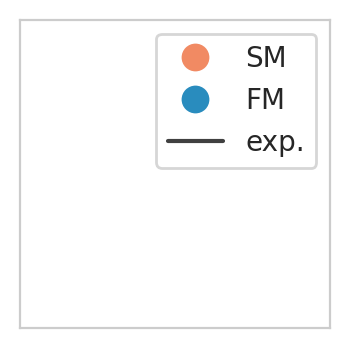

In [13]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

# Legends
fig, ax = plt.subplots(figsize=(2, 2), dpi=200)
plt.legend(
    handles=[
        Line2D([0], [0],
               label="SM", marker="o", markerfacecolor=color.CS_FG_A,
               markeredgewidth=0, markersize=10, linestyle=""),
        Line2D([0], [0],
               label="FM", marker="o", markerfacecolor=color.CS_FG_B,
               markeredgewidth=0, markersize=10, linestyle=""),
        Line2D([0], [0],
               label="exp.", color=color.CS_BG_DARK, linestyle="-"),
    ],
    # loc='lower right',
    # bbox_to_anchor=(1.28, 0)
)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### Phylogenetic Tree Visualization (Q-score)

In [6]:
from ete4.smartview import TreeLayout
from ete4 import Tree
from pathlib import Path

WD = Path("wd")
tree = Tree(open(str(WD / "qs-tree.all.formated.newick")))

for node in tree.traverse():
    node.support = None


def ns(n):
    n.sm_style["hz_line_width"] = 1.5
    n.sm_style["vt_line_width"] = 1.5
    n.sm_style['hz_line_color'] = color.CS_BG_DARK

    if n.is_leaf:
        ids = n.name.split("_")
        cls, mtd = ids[0], ids[1]
        if mtd == "SM":
            n.sm_style['size'] = 3
            n.sm_style['fgcolor'] = color.CS_FG_A
        elif mtd == "FM":
            n.sm_style['size'] = 3
            n.sm_style['fgcolor'] = color.CS_FG_B


tree.explore(
    keep_server=True,
    layouts=[
        TreeLayout(
            name="SUM_TREE",
            ns=ns,
            # ts=ts,
            active=True,
            aligned_faces=True
        )
    ])

Added tree tree-2 with id 0.


### Phylogenetic Tree Visualization (3Di)

In [2]:
from ete4.smartview import TreeLayout, NodeStyle
from ete4 import Tree
from pathlib import Path
import src.colorscheme as color
import pandas as pd

WD = Path("wd")
tree = Tree(open(str(WD / "3di.foldtree.norm.newick")))

def ns(n):
    n.sm_style["hz_line_width"] = 1.5
    n.sm_style["vt_line_width"] = 1.5
    n.sm_style['hz_line_color'] = color.CS_BG_DARK

    n.sm_style["hz_line_width"] = 1
    n.sm_style["vt_line_width"] = 1
    n.sm_style['hz_line_color'] = "#BBBBBB"
    n.sm_style['vt_line_color'] = "#BBBBBB"
    
    if n.is_leaf:
        ids = n.name.split("_")
        cls, mtd = ids[0], ids[1]
        if mtd == "SM":
            n.sm_style['size'] = 3
            n.sm_style['fgcolor'] = color.CS_FG_A
        elif mtd == "FM":
            n.sm_style['size'] = 3
            n.sm_style['fgcolor'] = color.CS_FG_B
        if cls == "BLDB":
            n.sm_style['hz_line_color'] = "#2A4458"
        elif cls == "CYTC":
            n.sm_style['hz_line_color'] = "#9872CA"
        elif cls == "RAS":
            n.sm_style['hz_line_color'] = "#95A77E"
        elif cls == "GFP":
            n.sm_style['hz_line_color'] = "#E5BE79"

tree.explore(
    keep_server=True,
    layouts=[
        TreeLayout(
            name="SUM_TREE",
            ns=ns,
            # ts=ts,
            active=True,
            aligned_faces=True
        )
    ])

Added tree tree-2 with id 0.


# Sequence-based Phylogenetic

In [20]:
from Bio import PDB
from Bio.SeqUtils import seq1

WD = Path("./wd/FastTree")
WD.mkdir()

fasta = "sequences.fasta"

with open(WD / fasta, "w") as f:
    for pdb in Path("./wd/3Di").glob("*.pdb"):
        parser = PDB.PDBParser(QUIET=True)
        structure = parser.get_structure("structure_id", pdb)
        for model in structure:
            for chain in model:
                sequence = ""
                for residue in chain:
                    if PDB.is_aa(residue, standard=True):
                        sequence += seq1(residue.get_resname())
                f.write(f">{pdb.stem}\n")
                f.write(f"{sequence}\n")

In [21]:
WD = "./wd/FastTree"
!cd {WD} && clustalo -i {fasta} -o {Path(fasta).stem}.aln.fasta --outfmt=fa

In [22]:
WD = "./wd"
!cd {WD} && fasttree FastTree/{Path(fasta).stem}.aln.fasta > fasttree.all.newick

FastTree Version 2.1.11 Double precision (No SSE3)
Alignment: FastTree/sequences.aln.fasta
Amino acid distances: BLOSUM45 Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jones-Taylor-Thorton, CAT approximation with 20 rate categories
14 seqs (at seed    600)         0.39 seconds: Joined    400 of    711   Initial topology in 0.57 seconds
Refining topology: 38 rounds ME-NNIs, 2 rounds ME-SPRs, 19 rounds ML-NNIs
     1.07 seconds: SPR round   1 of   2, 301 of 1426 nodes         1.39 seconds: SPR round   1 of   2, 601 of 1426 nodes         1.71 seconds: SPR round   1 of   2, 901 of 1426 nodes         1.94 seconds: SPR round   1 of   2, 1101 of 1426 nodes         2.17 seconds: SPR round   1 of   2, 1301 of 1426 nodes         2.37 seconds: ME NNI round 17 of 38, 1 of 712 splits         2.65 seconds: SPR round   2 of   2, 301 of 1426 nodes         2.96 seconds: SPR round   2 of   2,

In [4]:
from src.phylogenetics import normalize
normalize(input_path=WD / "fasttree.all.newick", output_path=WD / "fasttree.all.norm.newick")

In [8]:
from ete4.smartview import TreeLayout, NodeStyle
from ete4 import Tree
from pathlib import Path
import src.colorscheme as color
import pandas as pd

WD = Path("wd")
tree = Tree(open(str(WD / "fasttree.all.norm.newick")))

for node in tree.traverse():
    node.support = None

def ns(n):
    n.sm_style["hz_line_width"] = 1.5
    n.sm_style["vt_line_width"] = 1.5
    n.sm_style['hz_line_color'] = color.CS_BG_DARK

    n.sm_style["hz_line_width"] = 1
    n.sm_style["vt_line_width"] = 1
    n.sm_style['hz_line_color'] = "#BBBBBB"
    n.sm_style['vt_line_color'] = "#BBBBBB"
    if n.is_leaf:
        ids = n.name.split("_")
        cls, mtd = ids[0], ids[1]
        if mtd == "SM":
            n.sm_style['size'] = 3
            n.sm_style['fgcolor'] = color.CS_FG_A
        elif mtd == "FM":
            n.sm_style['size'] = 3
            n.sm_style['fgcolor'] = color.CS_FG_B
        if cls == "BLDB":
            n.sm_style['hz_line_color'] = "#2A4458"
        elif cls == "CYTC":
            n.sm_style['hz_line_color'] = "#9872CA"
        elif cls == "RAS":
            n.sm_style['hz_line_color'] = "#95A77E"
        elif cls == "GFP":
            n.sm_style['hz_line_color'] = "#E5BE79"

tree.explore(
    keep_server=True,
    layouts=[
        TreeLayout(
            name="SUM_TREE",
            ns=ns,
            # ts=ts,
            active=True,
            aligned_faces=True
        )
    ])

Added tree tree-8 with id 0.
